In [3]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Functions to be used:

In [5]:
def clean_data(df):
    df.columns = df.iloc[0]
    len_df = df.count().max() + 1 
    df.drop(df.index[[0, (len_df-3), (len_df-2), (len_df-1), len_df]],inplace=True) #dropping rows that we don't need 
    
#Need to convert interest rate and revolver utilization into numbers through another way, as percentage sign is a problem 
def numeric_fix(df):
    df['int_rate'] = df['int_rate'].map(lambda x: x.rstrip('%'))
    df['revol_util'] = df['revol_util'].map(lambda x: x.rstrip('%'))
    df[['annual_inc','dti','total_acc','revol_bal','open_acc','mort_acc','int_rate','revol_util']] = df[['annual_inc','dti','total_acc','revol_bal','open_acc','mort_acc','int_rate','revol_util']].apply(pd.to_numeric)
    df['int_rate'] = df['int_rate'].map(lambda x: x/100)
    df['revol_util'] = df['revol_util'].map(lambda x: x/100)
    
def master_class(row):
    if row['loan_status'] == 'Current' or row['loan_status'] == 'Fully Paid'or row['loan_status'] == 'In Grace Period'or row['loan_status'] == 'Late (16-30 days)':
        return "GOOD"
    else:
        return "BAD"

# Loading Data Correctly

In [7]:
# CORRECT way to load the data
df = pd.read_csv("LoanStats_2015.csv")
clean_data(df)
df = df[['grade','sub_grade','home_ownership','annual_inc','int_rate','loan_status','dti','total_acc','revol_bal'
          ,'revol_util','open_acc','pymnt_plan','emp_length','mort_acc']]
df.dropna(inplace=True)
numeric_fix(df)

/Users/luisfelipevelez/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,2,3,4,7,13,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Overview

Will look at correlations and pairplots for this data set as well. Want to see if also getting outliers in DTI

In [58]:
df.corr()

,annual_inc,int_rate,dti,total_acc,revol_bal,revol_util,open_acc,mort_acc
0,,,,,,,,
annual_inc,1.000000,-0.068147,-0.027299,0.176059,0.307176,0.058399,0.140270,0.211976
int_rate,-0.068147,1.000000,0.027953,-0.042187,-0.025360,0.180009,-0.001344,-0.088272
dti,-0.027299,0.027953,1.000000,0.027122,0.020196,0.026547,0.032931,-0.003409
total_acc,0.176059,-0.042187,0.027122,1.000000,0.203823,-0.114123,0.722304,0.350307
revol_bal,0.307176,-0.025360,0.020196,0.203823,1.000000,0.255624,0.230234,0.221427
revol_util,0.058399,0.180009,0.026547,-0.114123,0.255624,1.000000,-0.147467,0.035218
open_acc,0.140270,-0.001344,0.032931,0.722304,0.230234,-0.147467,1.000000,0.135723
mort_acc,0.211976,-0.088272,-0.003409,0.350307,0.221427,0.035218,0.135723,1.000000


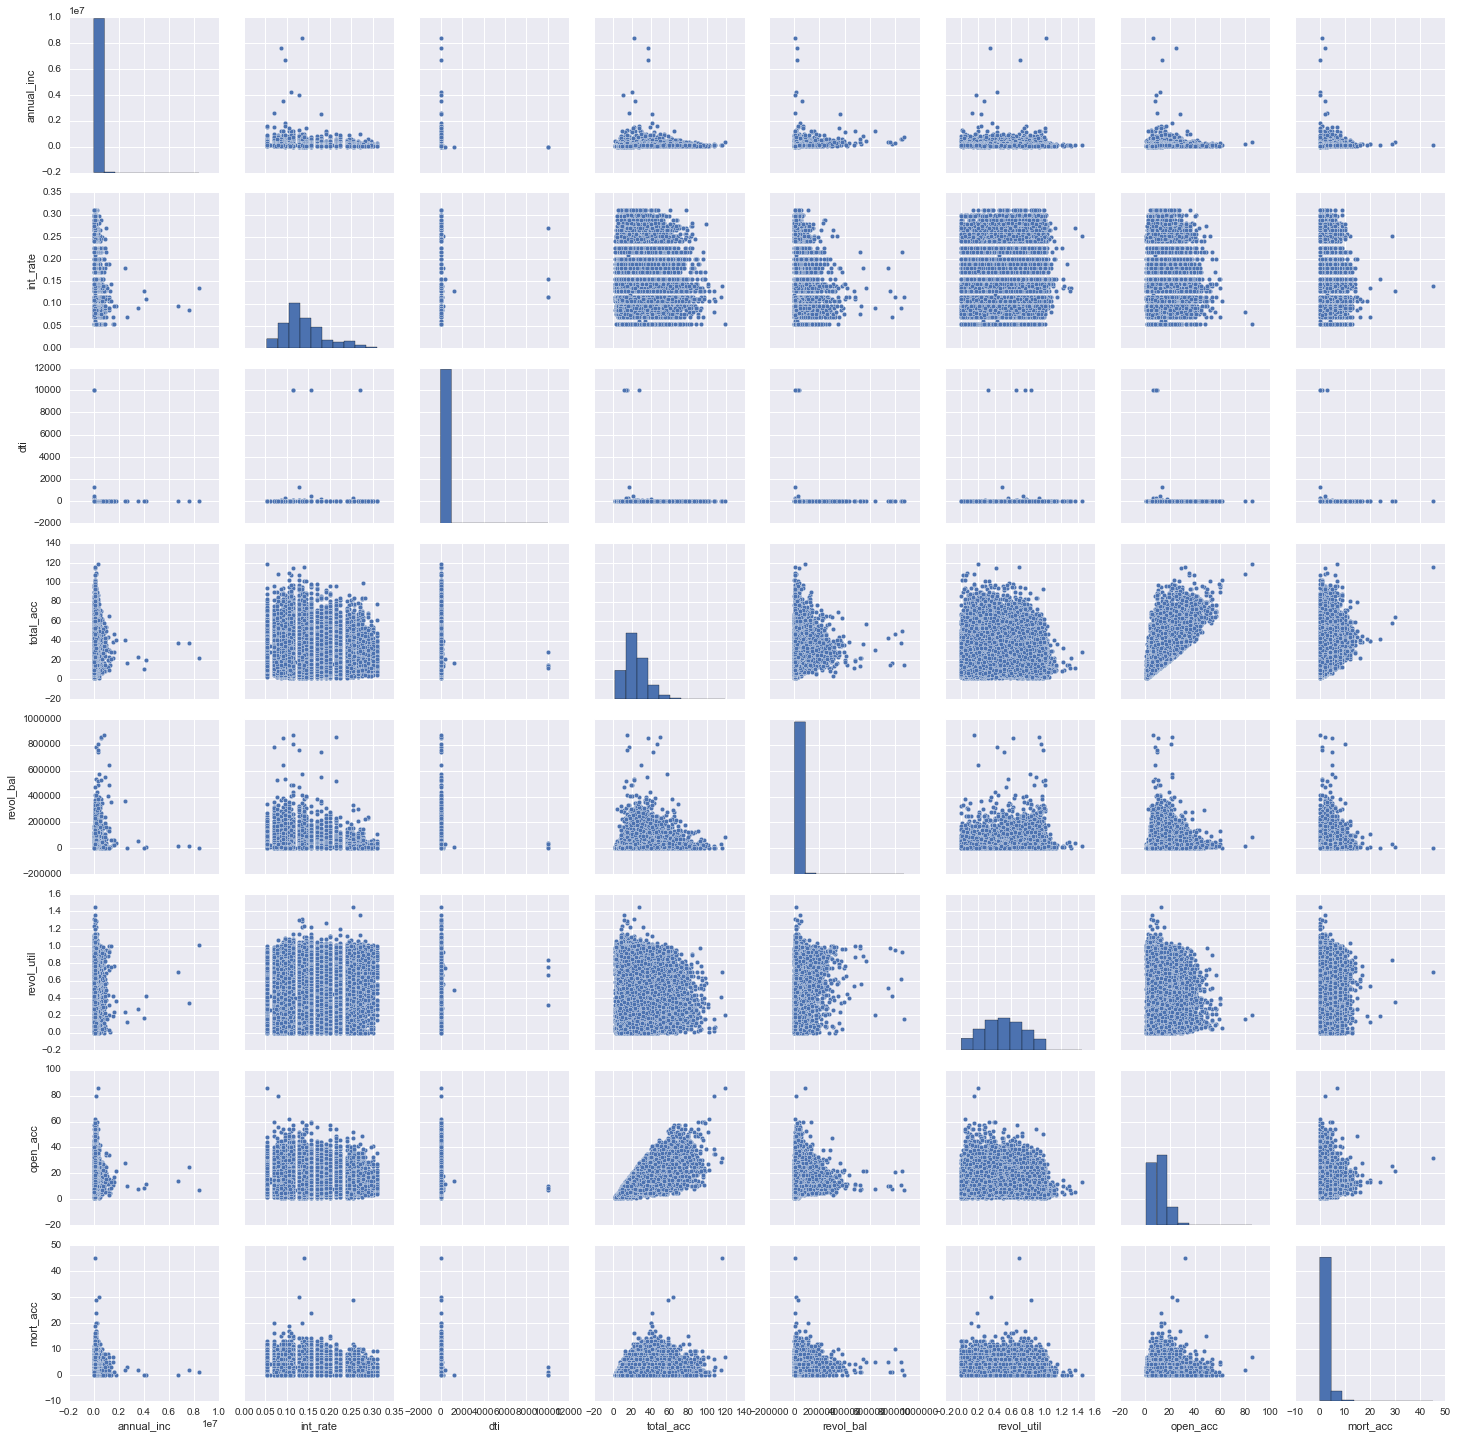

In [59]:
sns.pairplot(df);

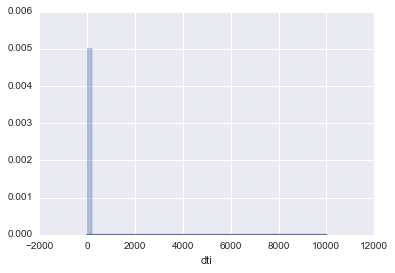

In [63]:
sns.distplot(df.dti)

Will eliminate the outliers where DTI is larger than 100. Seems to be some error in the recording.

In [8]:
df2 = df[df.dti < 100]

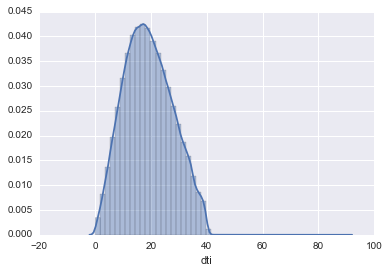

In [72]:
sns.distplot(df2.dti)

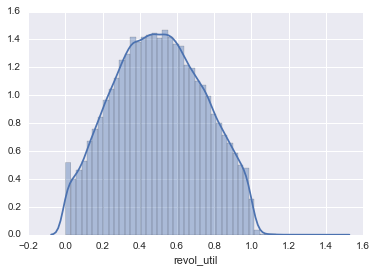

In [64]:
sns.distplot(df2.revol_util)

Revolver utilization and DTI seem to be normally distributed.  

In [77]:
df2.loan_status.value_counts(dropna=False)

Current               317121
Fully Paid             67708
Charged Off            19523
Late (31-120 days)      9804
In Grace Period         3858
Late (16-30 days)       2485
Default                  423
Name: loan_status, dtype: int64

Issued: New loan that has passed all Lending Club reviews, received full funding, and has been issued.
 
Not Yet Issued: Includes loan requests that are In Funding, loan requests that are In Review, and Notes that are Issuing. 

Current: Loan is up to date on all outstanding payments. 
 
In Grace Period: Loan is past due but within the 15-day grace period. 
 
Late (16-30): Loan has not been current for 16 to 30 days. Learn more about the tools Lending Club has to deal with delinquent borrowers.
 
Late (31-120): Loan has not been current for 31 to 120 days. Learn more about the tools Lending Club has to deal with delinquent borrowers.
 
Fully paid: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.

Default: Loan has not been current for 121 days or more. Learn more about the difference between “default” and “charge off”.
 
Charged Off: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. Learn more about the difference between “default” and “charge off”.

In [73]:
df2.head()

,grade,sub_grade,home_ownership,annual_inc,int_rate,loan_status,dti,total_acc,revol_bal,revol_util,open_acc,pymnt_plan,emp_length,mort_acc
1,A,A1,MORTGAGE,53750.0,0.0532,Current,15.30,19.0,3172.0,0.172,8.0,n,4 years,2.0
2,C,C2,MORTGAGE,64000.0,0.1288,Current,34.95,24.0,37828.0,0.672,17.0,n,3 years,4.0
3,B,B4,MORTGAGE,63000.0,0.1078,Current,10.78,18.0,7869.0,0.562,6.0,n,10+ years,5.0
4,C,C4,MORTGAGE,79000.0,0.1399,Current,34.53,72.0,22519.0,0.186,33.0,n,9 years,6.0
5,E,E3,RENT,55000.0,0.1989,Fully Paid,25.49,19.0,9568.0,0.460,18.0,n,8 years,0.0


# Logistic Regression and Classfication Analysis on the New Master Classes

Current               GOOD;
Fully Paid             GOOD;
Charged Off            BAD;
Late (31-120 days)      BAD;
In Grace Period         GOOD;
Late (16-30 days)       GOOD;
Default                  BAD;

In [9]:
def master_class(row):
    if row['loan_status'] == 'Current' or row['loan_status'] == 'Fully Paid'or row['loan_status'] == 'In Grace Period'or row['loan_status'] == 'Late (16-30 days)':
        return "GOOD"
    else:
        return "BAD"

In [10]:
##applying the master_class function
df2['Master_Status'] = df2.apply(master_class, axis=1)
###########

/Users/luisfelipevelez/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [96]:
df2.loan_status.value_counts(dropna=False)

Current               317121
Fully Paid             67708
Charged Off            19523
Late (31-120 days)      9804
In Grace Period         3858
Late (16-30 days)       2485
Default                  423
Name: loan_status, dtype: int64

In [11]:
df2.Master_Status.value_counts(dropna=False)

GOOD    391172
BAD      29750
Name: Master_Status, dtype: int64

Want to see the individual influence of two predictor variables on our classifier. The two predictor variables I will use are both continuous, and are the two that seem to be closely normal in distribution: DTI (debt to income ratio) and Revol_util (revolver utilization).

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [14]:
lm = LogisticRegression()
lm.fit(df2[['dti']], df2['Master_Status'])
print "A unit change in dti, changes log odds by:", lm.coef_
print "A unit change in dti, changes odds by:", np.exp(lm.coef_)

A unit change in dti, changes log odds by: [[-0.02876073]]
A unit change in dti, changes odds by: [[ 0.97164892]]


In [17]:
lm2 = LogisticRegression()
lm2.fit(df2[['revol_util']], df2['Master_Status'])
print "A unit change in dti, changes log odds by:", lm2.coef_
print "A unit change in dti, changes odds by:", np.exp(lm2.coef_)

A unit change in dti, changes log odds by: [[-0.38338393]]
A unit change in dti, changes odds by: [[ 0.68155118]]


In [22]:
lm3 = LogisticRegression()
feature_set = df2[['dti', 'revol_util']]
lm3.fit(feature_set, df2['Master_Status'])
print "A unit change in dti, changes log odds by:", lm3.coef_
print "A unit change in dti, changes odds by:", np.exp(lm3.coef_)

A unit change in dti, changes log odds by: [[-0.02777366 -0.21551473]]
A unit change in dti, changes odds by: [[ 0.97260848  0.80612639]]


Using the logistic regression model with both DTI and Revolver Utilization, I'm getting an accuracy of over 92%

In [24]:
lm3.score(feature_set, df2['Master_Status'])

0.92932182209530512

# Need to keep working on this. Look at using decision trees and random forests. Need to understand the role of CV and Gridsearch better. 